In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import silhouette_score
from MissForestExtra import MissForestExtra
import sklearn.cluster
import sys
import scipy
import scipy.cluster.hierarchy as sch
import Gap_statistics
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import functions

/home/elina/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Original dataframe

In [74]:
df_0_fill_ori = pd.read_csv('dataframe/df_o_fill.csv')
df_0_fill_ori_co = df_0_fill_ori.copy()

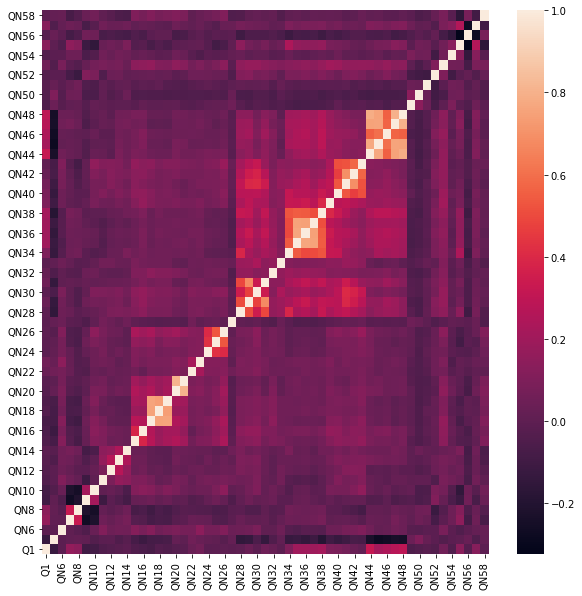

In [75]:
np.set_printoptions(threshold=sys.maxsize)
correlation_df_original = df_0_fill_ori.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_df_original)
ax.invert_yaxis()
plt.savefig("correlation/corr_original_0fill.png")

In [76]:
correlation_df_original.to_csv('correlation/corr_0fill.csv')

In [77]:
df_0_fill_ori[['QN18']] = df_0_fill_ori[['QN18']].replace([0,1],[1,1.5])
df_0_fill_ori[['QN19']] = df_0_fill_ori[['QN19']].replace([0,1],[1,1.5])
df_0_fill_ori[['QN21']] = df_0_fill_ori[['QN21']].replace([0,1],[1,1.5])
df_0_fill_ori[['QN28']] = df_0_fill_ori[['QN28']].replace([0,1],[1,1.5])
df_0_fill_ori[['QN31']] = df_0_fill_ori[['QN31']].replace([0,1],[1,1.5])
df_0_fill_ori[['QN34']] = df_0_fill_ori[['QN34']].replace([0,1],[1,1.5])
df_0_fill_ori[['QN36']] = df_0_fill_ori[['QN36']].replace([0,1],[1,1.5])
df_0_fill_ori[['QN37']] = df_0_fill_ori[['QN37']].replace([0,1],[1,1.5])
df_0_fill_ori[['QN40']] = df_0_fill_ori[['QN40']].replace([0,1],[1,1.5])
df_0_fill_ori[['QN45']] = df_0_fill_ori[['QN45']].replace([0,1],[1,1.5])
df_0_fill_ori[['QN47']] = df_0_fill_ori[['QN47']].replace([0,1],[1,1.5])
df_0_fill_ori[['QN48']] = df_0_fill_ori[['QN48']].replace([0,1],[1,1.5])

In [78]:
df_0_fill_ori.to_csv('dataframe/df_0fill_range.csv',index = False)

In [79]:
df_0_fill_ori = pd.read_csv('dataframe/df_0fill_range.csv')

In [80]:
df_gf_o = functions.gf_(df_0_fill_ori)
df_gf_o.head()

,Q1,Q2,dietary,hygiene,injury,mental_health,tobacco_use,alcohol_use,drug_use,sexual_behaviours,physical_activity,protective_factors
0,17.0,2.0,1.60,1.0,1.500000,1.666667,1.000000,1.000000,1.0,1.0,2.00,1.166667
1,16.0,1.0,1.25,1.0,1.285714,1.000000,1.166667,1.000000,1.0,1.6,1.75,1.333333
2,16.0,2.0,1.40,1.0,1.000000,1.000000,1.000000,1.666667,1.0,1.8,2.00,1.500000
3,15.0,2.0,1.50,1.0,1.285714,1.000000,1.000000,1.166667,1.0,1.0,2.00,1.500000
4,16.0,2.0,1.40,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,2.00,1.166667


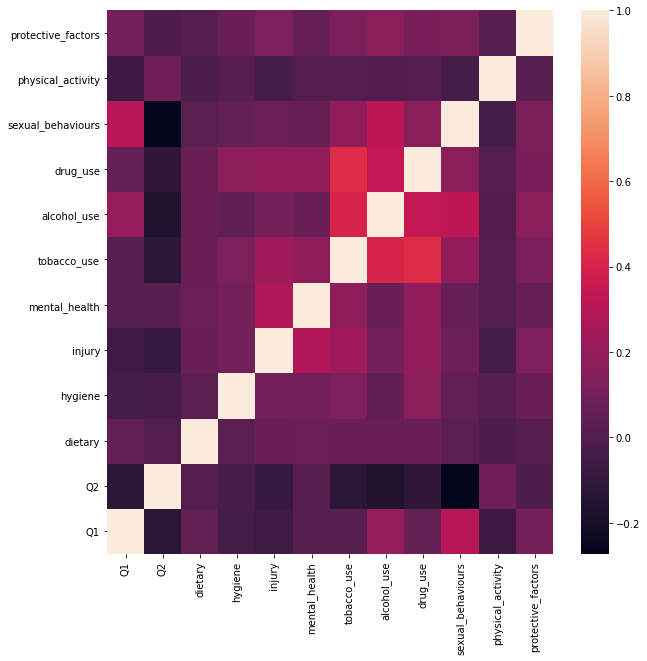

In [81]:
np.set_printoptions(threshold=sys.maxsize)
correlation_df_original_gf = df_gf_o.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_df_original_gf)
ax.invert_yaxis()
plt.savefig("correlation/corr_original_0fill_gf.png")

In [82]:
correlation_df_original_gf.to_csv('correlation/corr_0fill_gf.csv')

## Iterative imputed dataframe

In [83]:
df_iterative = pd.read_csv('dataframe/df_o_fill_ite.csv')

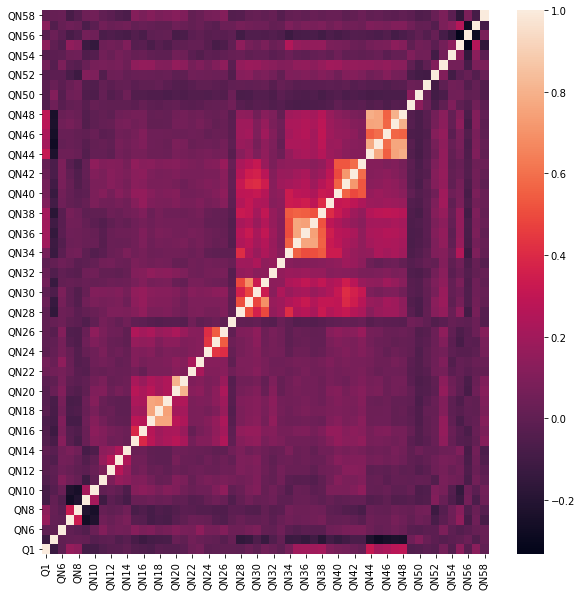

In [84]:
np.set_printoptions(threshold=sys.maxsize)
correlation_df_iterative = df_iterative.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_df_iterative)
ax.invert_yaxis()
plt.savefig("correlation/corr_iterative_0fill.png")

In [85]:
correlation_df_iterative.to_csv('correlation/df_ite_corr.csv',index = False)

In [86]:
df_iterative[['QN18']] = df_iterative[['QN18']].replace([0,1],[1,1.5])
df_iterative[['QN19']] = df_iterative[['QN19']].replace([0,1],[1,1.5])
df_iterative[['QN21']] = df_iterative[['QN21']].replace([0,1],[1,1.5])
df_iterative[['QN28']] = df_iterative[['QN28']].replace([0,1],[1,1.5])
df_iterative[['QN31']] = df_iterative[['QN31']].replace([0,1],[1,1.5])
df_iterative[['QN34']] = df_iterative[['QN34']].replace([0,1],[1,1.5])
df_iterative[['QN36']] = df_iterative[['QN36']].replace([0,1],[1,1.5])
df_iterative[['QN37']] = df_iterative[['QN37']].replace([0,1],[1,1.5])
df_iterative[['QN40']] = df_iterative[['QN40']].replace([0,1],[1,1.5])
df_iterative[['QN45']] = df_iterative[['QN45']].replace([0,1],[1,1.5])
df_iterative[['QN47']] = df_iterative[['QN47']].replace([0,1],[1,1.5])
df_iterative[['QN48']] = df_iterative[['QN48']].replace([0,1],[1,1.5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 71942.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 740, cost: 63986.0
Run 1, iteration: 2/100, moves: 235, cost: 63986.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 802, cost: 62978.0
Run 1, iteration: 2/100, moves: 281, cost: 62860.0
Run 1, iteration: 3/100, moves: 229, cost: 62714.0
Run 1, iteration: 4/100, moves: 54, cost: 62714.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10

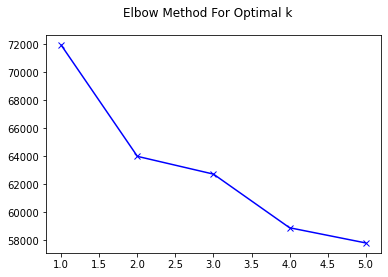

In [87]:
functions.elbow_kmode(df_iterative,1,6,'_ofill_ite')

In [88]:
kmode = KModes(n_clusters=2, init = 'Cao', n_init = 5, verbose=1)
kmode.fit_predict(df_iterative)
res = functions.result(df_iterative,kmode.labels_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 740, cost: 63986.0
Run 1, iteration: 2/100, moves: 235, cost: 63986.0


In [89]:
df_gf_o.insert(12, "Kmd_ite_2",kmode.labels_ , True)

In [90]:
res.to_csv('clustering_result/df_ite_kmodes_range.csv',index = False)

In [91]:
df_iterative.to_csv('dataframe/df_ite_range.csv',index = False)

In [92]:
df_iterative = pd.read_csv('dataframe/df_ite_range.csv')

In [93]:
df_ite_gf = functions.gf_(df_iterative)
df_ite_ori = df_ite_gf.copy()

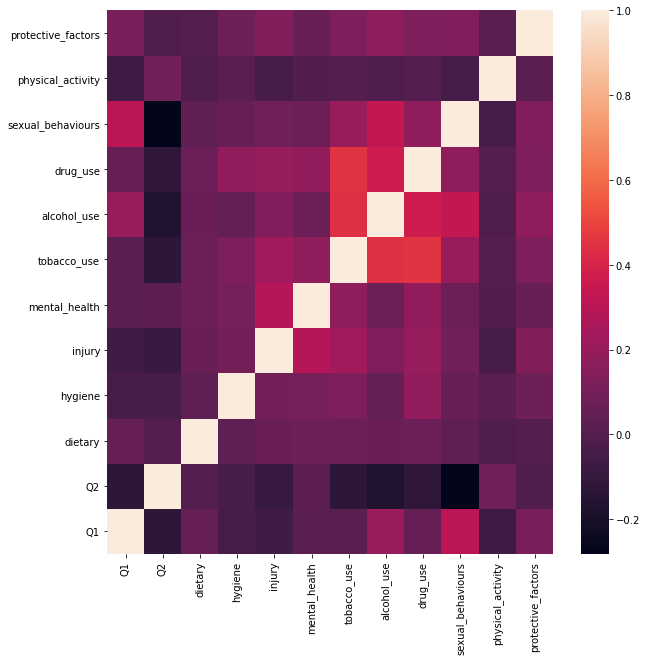

In [94]:
np.set_printoptions(threshold=sys.maxsize)
correlation_df_gf_iterative = df_ite_gf.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_df_gf_iterative)
ax.invert_yaxis()
plt.savefig("correlation/corr_iterative_0fill_gf.png")

In [95]:
correlation_df_gf_iterative.to_csv('correlation/df_ite_corr_gf.csv',index = True)

In [96]:
df_ite_gf.drop(df_ite_gf.columns[0], axis=1, inplace=True)
df_ite_gf.drop(df_ite_gf.columns[0], axis=1, inplace=True)

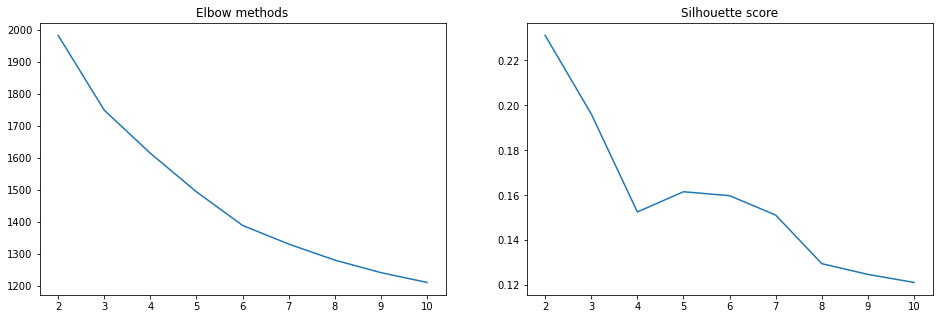

In [97]:
functions.elbow_kmeans(df_ite_gf,'ite')

In [98]:
df_ite_gf_km_2= sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(df_ite_gf)
Km_ite_2 = df_ite_gf_km_2.labels_
df_gf_o.insert(13, "Km_ite_2",Km_ite_2 , True)
df_ite_gf_km_6= sklearn.cluster.KMeans(n_clusters=6, random_state=0).fit(df_ite_gf)
Km_ite_6 = df_ite_gf_km_6.labels_
df_gf_o.insert(14, "Km_ite_6",Km_ite_6 , True)
df_gf_o.head()

,Q1,Q2,dietary,hygiene,injury,mental_health,tobacco_use,alcohol_use,drug_use,sexual_behaviours,physical_activity,protective_factors,Kmd_ite_2,Km_ite_2,Km_ite_6
0,17.0,2.0,1.60,1.0,1.500000,1.666667,1.000000,1.000000,1.0,1.0,2.00,1.166667,0,0,3
1,16.0,1.0,1.25,1.0,1.285714,1.000000,1.166667,1.000000,1.0,1.6,1.75,1.333333,0,1,2
2,16.0,2.0,1.40,1.0,1.000000,1.000000,1.000000,1.666667,1.0,1.8,2.00,1.500000,0,1,4
3,15.0,2.0,1.50,1.0,1.285714,1.000000,1.000000,1.166667,1.0,1.0,2.00,1.500000,0,0,1
4,16.0,2.0,1.40,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,2.00,1.166667,0,0,1


In [99]:
df_ite_gf_km={}
df_ite_gf_km_6= sklearn.cluster.KMeans(n_clusters=6, random_state=0).fit(df_ite_gf)
df_ite_gf_km['6'] = functions.result(df_ite_ori,df_ite_gf_km_6.labels_)
df_ite_gf_km_2= sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(df_ite_gf)
df_ite_gf_km['2'] = functions.result(df_ite_ori,df_ite_gf_km_2.labels_)
df_ite_gf_km['2'].head()
df_ite_gf_km['2'].to_csv('clustering_result/result_ite_kmeans_2.csv',index = False)
df_ite_gf_km['6'].to_csv('clustering_result/result_ite_kmeans_6.csv',index = False)
#print(f'Silhouette Score(n=3): { (df_ite_gf, df_ite_gf_km.labels_)}')
#df_ite_gf_km_res = result_gf(df_iterative_o,df_ite_gf_km.labels_)
#df_ite_gf_km_res.head()

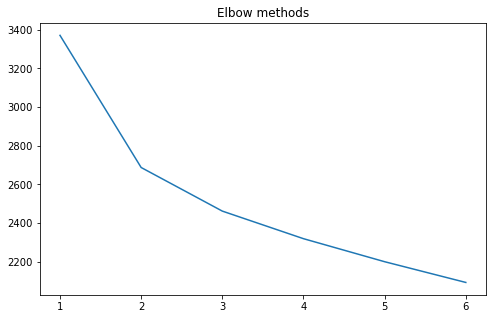

In [100]:
functions.kprototypes_elbow(df_ite_ori,'ite')

Text(0, 0.5, 'score')

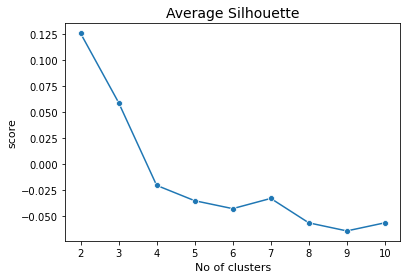

In [101]:
df_ite_ori['Q1'] = df_ite_ori['Q1'].apply(str)
df_ite_ori['Q2'] = df_ite_ori['Q2'].apply(str)
df_ite_ori.select_dtypes('object').nunique()
catColumnsPos = [df_ite_ori.columns.get_loc(col) for col in list(df_ite_ori.select_dtypes('object').columns)]
silhouette_avg = []
# calculate average silhouette score for each number of cluster (2 to 10)
num_clusters = np.arange(2,11)
for k in num_clusters:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=0)
    kproto.fit_predict(df_ite_ori, categorical= catColumnsPos)
    cluster_labels = kproto.labels_
    silhouette_avg.append(silhouette_score(df_ite_ori, cluster_labels))
# plot average silhouette score against number of clusters
ax = sns.lineplot(x=num_clusters, y=silhouette_avg, marker="o")
ax.set_title('Average Silhouette', fontsize=14)
ax.set_xlabel('No of clusters', fontsize=11)
ax.set_ylabel('score', fontsize=11)

In [102]:
df_ite_kp = functions.kprototypes_(df_ite_ori,2)
df_ite_kp.to_csv('clustering_result/result_ite_kp.csv',index = False)

In [103]:
df_ite_ori['Q1'] = df_ite_ori['Q1'].apply(str)
df_ite_ori['Q2'] = df_ite_ori['Q2'].apply(str)
df_ite_ori.select_dtypes('object').nunique()
catColumnsPos = [df_ite_ori.columns.get_loc(col) for col in list(df_ite_ori.select_dtypes('object').columns)]
#dfMatrix = df_ite_ori.to_numpy()
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 0)
kprototype.fit_predict(df_ite_ori, categorical = catColumnsPos)
df_gf_o.insert(15,'kp_ite_2',kprototype.labels_,True)
df_gf_o.head()

,Q1,Q2,dietary,hygiene,injury,mental_health,tobacco_use,alcohol_use,drug_use,sexual_behaviours,physical_activity,protective_factors,Kmd_ite_2,Km_ite_2,Km_ite_6,kp_ite_2
0,17.0,2.0,1.60,1.0,1.500000,1.666667,1.000000,1.000000,1.0,1.0,2.00,1.166667,0,0,3,0
1,16.0,1.0,1.25,1.0,1.285714,1.000000,1.166667,1.000000,1.0,1.6,1.75,1.333333,0,1,2,1
2,16.0,2.0,1.40,1.0,1.000000,1.000000,1.000000,1.666667,1.0,1.8,2.00,1.500000,0,1,4,1
3,15.0,2.0,1.50,1.0,1.285714,1.000000,1.000000,1.166667,1.0,1.0,2.00,1.500000,0,0,1,0
4,16.0,2.0,1.40,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,2.00,1.166667,0,0,1,0


## mca

In [104]:
df_mca = pd.read_csv('dataframe/MCA_df_ofill.csv')
df_mca.head()

,Q1,Q2,QN6,QN7,QN8,QN9,QN10,QN11,QN12,QN13,...,QN49,QN50,QN51,QN52,QN53,QN54,QN55,QN56,QN57,QN58
0,17,2,2,1,1,2,2,1,1,1,...,2,2,2,2,1,1,1,1,2,1
1,16,1,1,1,2,2,1,1,1,1,...,2,2,1,2,1,1,2,1,1,2
2,16,2,1,2,2,1,1,1,1,1,...,2,2,2,2,1,1,2,2,2,1
3,15,2,1,2,2,1,1,1,1,1,...,2,2,2,2,1,1,2,2,2,1
4,16,2,1,2,2,1,1,1,1,1,...,2,2,2,2,1,1,2,1,1,1


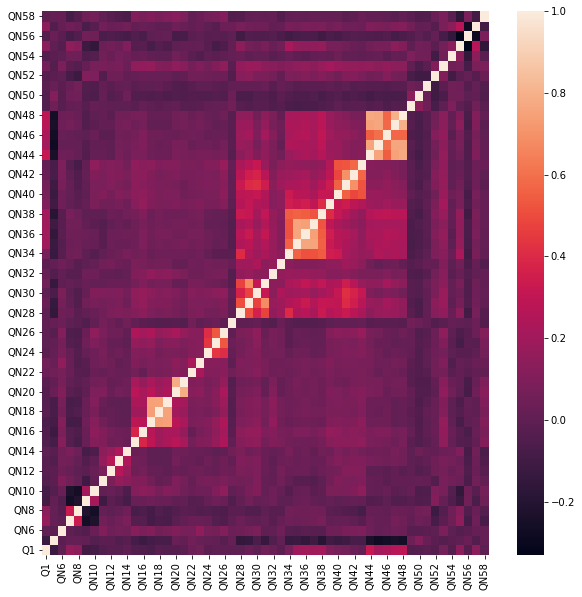

In [105]:
np.set_printoptions(threshold=sys.maxsize)
correlation_df_mca = df_mca.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_df_mca)
ax.invert_yaxis()
plt.savefig("correlation/corr_mca_0fill.png")

In [106]:
correlation_df_mca.to_csv('correlation/df_mca_corr.csv',index = False)

In [107]:
df_mca[['QN18']] = df_mca[['QN18']].replace([0,1],[1,1.5])
df_mca[['QN19']] = df_mca[['QN19']].replace([0,1],[1,1.5])
df_mca[['QN21']] = df_mca[['QN21']].replace([0,1],[1,1.5])
df_mca[['QN28']] = df_mca[['QN28']].replace([0,1],[1,1.5])
df_mca[['QN31']] = df_mca[['QN31']].replace([0,1],[1,1.5])
df_mca[['QN34']] = df_mca[['QN34']].replace([0,1],[1,1.5])
df_mca[['QN36']] = df_mca[['QN36']].replace([0,1],[1,1.5])
df_mca[['QN37']] = df_mca[['QN37']].replace([0,1],[1,1.5])
df_mca[['QN40']] = df_mca[['QN40']].replace([0,1],[1,1.5])
df_mca[['QN45']] = df_mca[['QN45']].replace([0,1],[1,1.5])
df_mca[['QN47']] = df_mca[['QN47']].replace([0,1],[1,1.5])
df_mca[['QN48']] = df_mca[['QN48']].replace([0,1],[1,1.5])

In [108]:
df_mca.to_csv('dataframe/df_mca_range.csv',index = False)

In [109]:
df_mca = pd.read_csv('dataframe/df_mca_range.csv')

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 71030.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 653, cost: 63323.0
Run 1, iteration: 2/100, moves: 170, cost: 63323.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 763, cost: 62132.0
Run 1, iteration: 2/100, moves: 158, cost: 62130.0
Run 1, iteration: 3/100, moves: 2, cost: 62130.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1093, cost: 59813.0
Run 1, iteration: 2/10

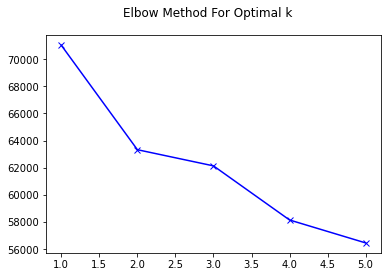

In [110]:
functions.elbow_kmode(df_mca,1,6,'_ofill_mca')

In [111]:
kmode = KModes(n_clusters=2, init = 'Cao', n_init = 5, verbose=1)
kmode.fit_predict(df_mca)
res = functions.result(df_mca,kmode.labels_)
res.to_csv('clustering_result/df_mca_kmodes.csv',index = False)
df_gf_o.insert(16, "Kmd_mca_2",kmode.labels_ , True)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 653, cost: 63323.0
Run 1, iteration: 2/100, moves: 170, cost: 63323.0


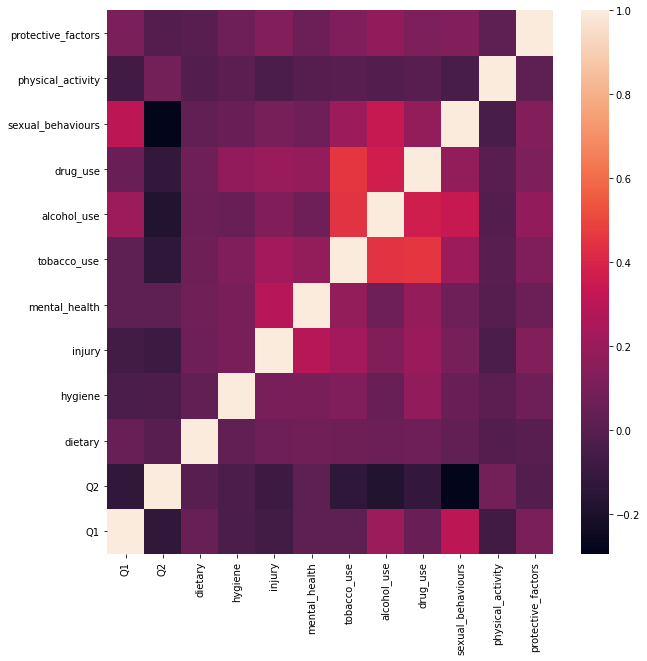

In [112]:
df_mca_gf = functions.gf_(df_mca)
df_mca_ori = df_mca.copy()
np.set_printoptions(threshold=sys.maxsize)
correlation_df_mca_gf = df_mca_gf.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_df_mca_gf)
ax.invert_yaxis()
plt.savefig("corr_mca_0fill_gf.png")

In [113]:
correlation_df_mca_gf.to_csv('correlation/df_mca_corr_gf.csv',index = True)

In [114]:
df_mca_gf.drop(df_mca_gf.columns[0], axis=1, inplace=True)
df_mca_gf.drop(df_mca_gf.columns[0], axis=1, inplace=True)

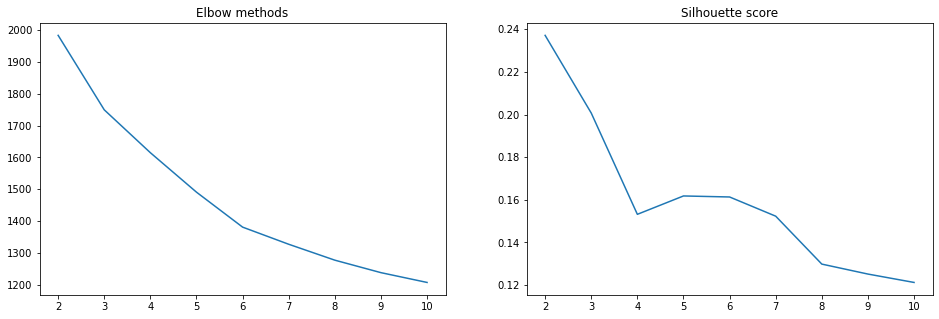

In [115]:
functions.elbow_kmeans(df_mca_gf,'mca')

In [116]:
df_mca_gf_km_2= sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(df_mca_gf)
Km_mca_2 = df_mca_gf_km_2.labels_
df_gf_o.insert(17, "Km_mca_2",Km_mca_2 , True)
df_mca_gf_km_6= sklearn.cluster.KMeans(n_clusters=6, random_state=0).fit(df_mca_gf)
Km_mca_6 = df_mca_gf_km_6.labels_
df_gf_o.insert(18, "Km_mca_6",Km_mca_6 , True)

In [117]:
df_mca_gf_km={}
df_mca_gf_km_6= sklearn.cluster.KMeans(n_clusters=6, random_state=0).fit(df_mca_gf)
df_mca_gf_km['6'] = functions.result(df_mca_ori,df_mca_gf_km_6.labels_)
df_mca_gf_km_2= sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(df_mca_gf)
df_mca_gf_km['2'] = functions.result(df_mca_ori,df_mca_gf_km_2.labels_)
df_mca_gf_km['2'].head()
#print(f'Silhouette Score(n=3): {silhouette_score(df_f_gf, df_f_gf_km.labels_)}')
#df_ite_gf_km_res = result_gf(df_iterative_o,df_ite_gf_km.labels_)
#df_ite_gf_km_res.head()

,11,12,13,14,15,16,17,18,Female,Male,dietary,hygiene,injury,mental_health,tobacco_use,alcohol_use,drug_use,sexual_behaviours,physical_activity,protective_factors
0,17,7,107,140,229,304,325,709,677,1161,2692.2,2011.0,2566.785714,2253.333333,2329.083333,2631.666667,2099.125,3133.3,2889.75,2850.000000
1,15,57,415,468,535,417,371,415,1712,981,3896.8,2875.5,3534.571429,3158.000000,3071.083333,3112.166667,2778.500,2842.8,4291.25,4010.833333


In [118]:
df_mca_gf_km['2'].to_csv('clustering_result/result_mca_kmeans_2.csv',index = False)
df_mca_gf_km['6'].to_csv('clustering_result/result_mca_kmeans_6.csv',index = False)

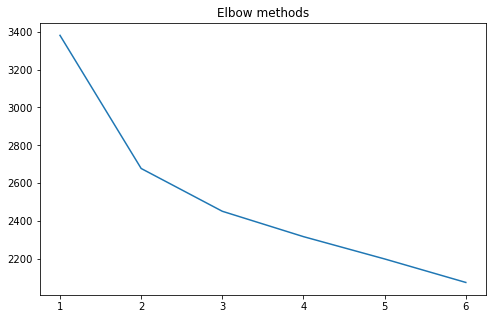

In [119]:
functions.kprototypes_elbow(df_mca_ori,'mca')

In [120]:
df_mca_kp = functions.kprototypes_(df_mca_ori,2)
df_mca_kp.to_csv('clustering_result/result_mca_kp.csv',index = False)

In [121]:
df_mca_ori['Q1'] = df_mca_ori['Q1'].apply(str)
df_mca_ori['Q2'] = df_mca_ori['Q2'].apply(str)
df_mca_ori.select_dtypes('object').nunique()
catColumnsPos = [df_mca_ori.columns.get_loc(col) for col in list(df_mca_ori.select_dtypes('object').columns)]
dfMatrix = df_mca_ori.to_numpy()
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
df_gf_o.insert(19,'kp_mca_2',kprototype.labels_,True)
df_gf_o.head()

,Q1,Q2,dietary,hygiene,injury,mental_health,tobacco_use,alcohol_use,drug_use,sexual_behaviours,physical_activity,protective_factors,Kmd_ite_2,Km_ite_2,Km_ite_6,kp_ite_2,Kmd_mca_2,Km_mca_2,Km_mca_6,kp_mca_2
0,17.0,2.0,1.60,1.0,1.500000,1.666667,1.000000,1.000000,1.0,1.0,2.00,1.166667,0,0,3,0,0,1,1,0
1,16.0,1.0,1.25,1.0,1.285714,1.000000,1.166667,1.000000,1.0,1.6,1.75,1.333333,0,1,2,1,0,0,0,1
2,16.0,2.0,1.40,1.0,1.000000,1.000000,1.000000,1.666667,1.0,1.8,2.00,1.500000,0,1,4,1,0,0,3,1
3,15.0,2.0,1.50,1.0,1.285714,1.000000,1.000000,1.166667,1.0,1.0,2.00,1.500000,0,0,1,0,0,1,2,0
4,16.0,2.0,1.40,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,2.00,1.166667,0,0,1,0,0,1,2,0


## MissForest 

In [122]:
df_mf = pd.read_csv('dataframe/missForest_df_ofill.csv')

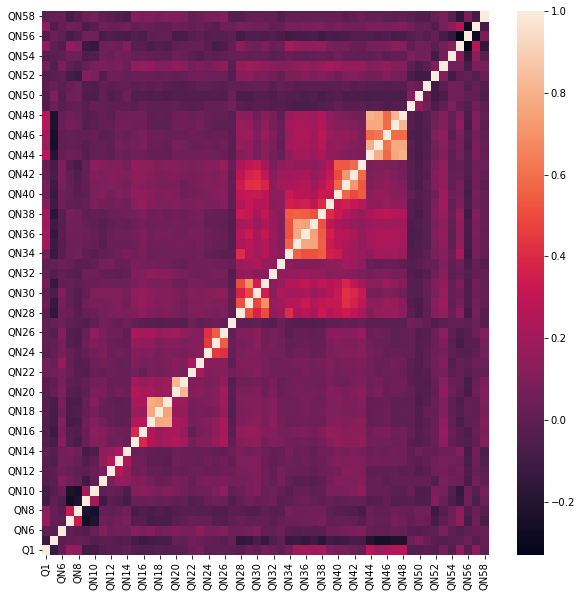

In [123]:
np.set_printoptions(threshold=sys.maxsize)
correlation_df_mf = df_mf.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_df_mf)
ax.invert_yaxis()
plt.savefig("corr_mf_0fill.png")

In [124]:
correlation_df_mf.to_csv('correlation/df_mf_corr.csv',index = False)

In [125]:
df_mf[['QN18']] = df_mf[['QN18']].replace([0,1],[1,1.5])
df_mf[['QN19']] = df_mf[['QN19']].replace([0,1],[1,1.5])
df_mf[['QN21']] = df_mf[['QN21']].replace([0,1],[1,1.5])
df_mf[['QN28']] = df_mf[['QN28']].replace([0,1],[1,1.5])
df_mf[['QN31']] = df_mf[['QN31']].replace([0,1],[1,1.5])
df_mf[['QN34']] = df_mf[['QN34']].replace([0,1],[1,1.5])
df_mf[['QN36']] = df_mf[['QN36']].replace([0,1],[1,1.5])
df_mf[['QN37']] = df_mf[['QN37']].replace([0,1],[1,1.5])
df_mf[['QN40']] = df_mf[['QN40']].replace([0,1],[1,1.5])
df_mf[['QN45']] = df_mf[['QN45']].replace([0,1],[1,1.5])
df_mf[['QN47']] = df_mf[['QN47']].replace([0,1],[1,1.5])
df_mf[['QN48']] = df_mf[['QN48']].replace([0,1],[1,1.5])

In [126]:
df_mf.to_csv('dataframe/df_mf_range.csv',index = False)

In [127]:
df_mf = pd.read_csv('dataframe/df_mf_range.csv')

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 70793.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 661, cost: 63762.0
Run 1, iteration: 2/100, moves: 133, cost: 63651.0
Run 1, iteration: 3/100, moves: 32, cost: 63651.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 697, cost: 62928.0
Run 1, iteration: 2/100, moves: 249, cost: 62811.0
Run 1, iteration: 3/100, moves: 32, cost: 62811.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100

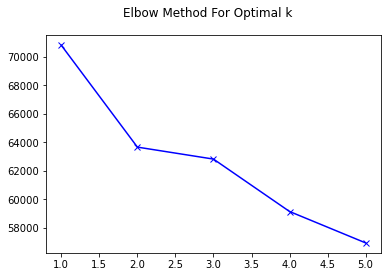

In [128]:
functions.elbow_kmode(df_mf,1,6,'_ofill_mca')

In [129]:
kmode = KModes(n_clusters=2, init = 'Cao', n_init = 5, verbose=1)
kmode.fit_predict(df_mf)
res = functions.result(df_mf,kmode.labels_)
res.to_csv('clustering_result/df_mf_kmodes.csv',index = False)
df_gf_o.insert(20, "Kmd_mf_2",kmode.labels_ , True)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 661, cost: 63762.0
Run 1, iteration: 2/100, moves: 133, cost: 63651.0
Run 1, iteration: 3/100, moves: 32, cost: 63651.0


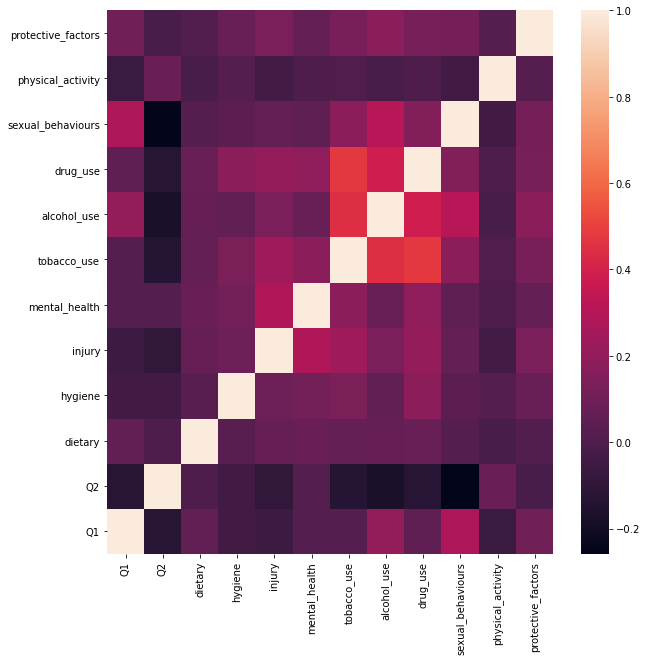

In [130]:
df_mf_gf = functions.gf_(df_mf)
df_mf_ori = df_mf.copy()
np.set_printoptions(threshold=sys.maxsize)
correlation_df_mf_gf = df_mf_gf.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_df_mf_gf)
ax.invert_yaxis()
plt.savefig("corr_mf_0fill_gf.png")

In [131]:
correlation_df_mf_gf.to_csv('correlation/df_mf_corr_gf.csv',index = True)

In [132]:
df_mf_gf.drop(df_mf_gf.columns[0], axis=1, inplace=True)
df_mf_gf.drop(df_mf_gf.columns[0], axis=1, inplace=True)

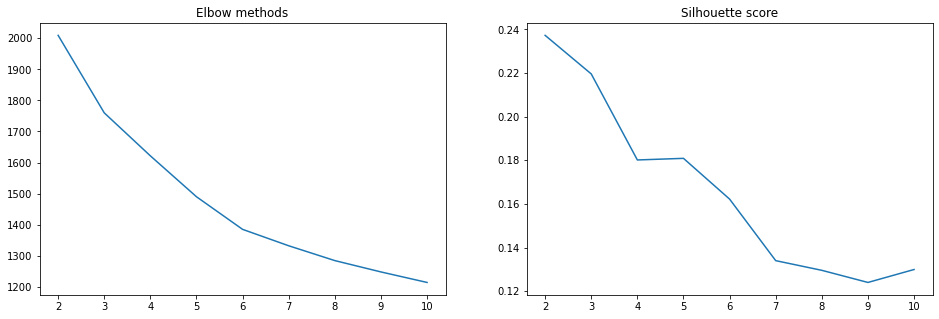

In [133]:
functions.elbow_kmeans(df_mf_gf,'mf')

In [134]:
df_mf_gf_km_2= sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(df_mf_gf)
Km_mf_2 = df_mf_gf_km_2.labels_
df_gf_o.insert(21, "Km_mf_2",Km_mf_2 , True)
df_mf_gf_km_6= sklearn.cluster.KMeans(n_clusters=6, random_state=0).fit(df_mf_gf)
Km_mf_6 = df_mf_gf_km_6.labels_
df_gf_o.insert(22, "Km_mf_6",Km_mf_6 , True)

In [135]:
df_mf_gf_km={}
df_mf_gf_km_6= sklearn.cluster.KMeans(n_clusters=6, random_state=0).fit(df_mf_gf)
df_mf_gf_km['6'] = functions.result(df_mf_ori,df_mf_gf_km_6.labels_)
df_mf_gf_km_2= sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(df_mf_gf)
df_mf_gf_km['2'] = functions.result(df_mf_ori,df_mf_gf_km_2.labels_)
df_mf_gf_km['2'].head()
#print(f'Silhouette Score(n=3): {silhouette_score(df_f_gf, df_f_gf_km.labels_)}')
#df_ite_gf_km_res = result_gf(df_iterative_o,df_ite_gf_km.labels_)
#df_ite_gf_km_res.head()

,11,12,13,14,15,16,17,18,Female,Male,dietary,hygiene,injury,mental_health,tobacco_use,alcohol_use,drug_use,sexual_behaviours,physical_activity,protective_factors
0,16,6,110,145,234,294,324,669,687,1111,2631.2,1962.75,2473.428571,2200.166667,2275.00,2555.750000,2055.875,3062.7,2823.25,2782.833333
1,16,60,418,469,519,427,372,452,1697,1036,3959.2,2923.50,3577.285714,3218.500000,3135.75,3203.666667,2833.000,2847.5,4356.00,4078.500000


In [136]:
df_mf_gf_km['2'].to_csv('clustering_result/result_mf_kmeans_2.csv',index = False)
df_mf_gf_km['6'].to_csv('clustering_result/result_mf_kmeans_6.csv',index = False)

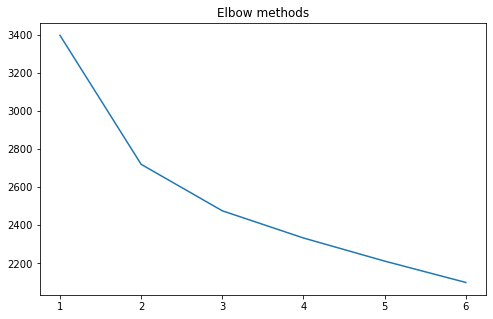

In [137]:
functions.kprototypes_elbow(df_mf_ori,'mf')

In [138]:
df_mf_kp = functions.kprototypes_(df_mf_ori,2)
df_mf_kp.to_csv('clustering_result/result_mf_kp.csv',index = False)

In [139]:
df_mf_ori['Q1'] = df_mf_ori['Q1'].apply(str)
df_mf_ori['Q2'] = df_mf_ori['Q2'].apply(str)
df_mf_ori.select_dtypes('object').nunique()
catColumnsPos = [df_mf_ori.columns.get_loc(col) for col in list(df_mf_ori.select_dtypes('object').columns)]
dfMatrix = df_mf_ori.to_numpy()
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
df_gf_o.insert(23,'kp_mf_2',kprototype.labels_,True)
df_gf_o.head()

,Q1,Q2,dietary,hygiene,injury,mental_health,tobacco_use,alcohol_use,drug_use,sexual_behaviours,...,Km_ite_6,kp_ite_2,Kmd_mca_2,Km_mca_2,Km_mca_6,kp_mca_2,Kmd_mf_2,Km_mf_2,Km_mf_6,kp_mf_2
0,17.0,2.0,1.60,1.0,1.500000,1.666667,1.000000,1.000000,1.0,1.0,...,3,0,0,1,1,0,0,1,0,0
1,16.0,1.0,1.25,1.0,1.285714,1.000000,1.166667,1.000000,1.0,1.6,...,2,1,0,0,0,1,0,0,4,1
2,16.0,2.0,1.40,1.0,1.000000,1.000000,1.000000,1.666667,1.0,1.8,...,4,1,0,0,3,1,0,0,1,1
3,15.0,2.0,1.50,1.0,1.285714,1.000000,1.000000,1.166667,1.0,1.0,...,1,0,0,1,2,0,0,1,5,0
4,16.0,2.0,1.40,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,...,1,0,0,1,2,0,0,1,5,0


In [140]:
df_gf_o.head()

,Q1,Q2,dietary,hygiene,injury,mental_health,tobacco_use,alcohol_use,drug_use,sexual_behaviours,...,Km_ite_6,kp_ite_2,Kmd_mca_2,Km_mca_2,Km_mca_6,kp_mca_2,Kmd_mf_2,Km_mf_2,Km_mf_6,kp_mf_2
0,17.0,2.0,1.60,1.0,1.500000,1.666667,1.000000,1.000000,1.0,1.0,...,3,0,0,1,1,0,0,1,0,0
1,16.0,1.0,1.25,1.0,1.285714,1.000000,1.166667,1.000000,1.0,1.6,...,2,1,0,0,0,1,0,0,4,1
2,16.0,2.0,1.40,1.0,1.000000,1.000000,1.000000,1.666667,1.0,1.8,...,4,1,0,0,3,1,0,0,1,1
3,15.0,2.0,1.50,1.0,1.285714,1.000000,1.000000,1.166667,1.0,1.0,...,1,0,0,1,2,0,0,1,5,0
4,16.0,2.0,1.40,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,...,1,0,0,1,2,0,0,1,5,0


In [144]:
df_gf_o.value_counts(subset=["Kmd_ite_2","Kmd_mca_2","Kmd_mf_2"]).head()

Kmd_ite_2  Kmd_mca_2  Kmd_mf_2
0          0          0           3119
1          1          1           1108
                      0            110
           0          0             57
0          0          1             43
dtype: int64

In [145]:
df_gf_o.value_counts(subset=["Km_ite_2","Km_mca_2","Km_mf_2"]).head()

Km_ite_2  Km_mca_2  Km_mf_2
0         1         1          2603
1         0         0          1745
                    1            81
          1         1            40
0         1         0            35
dtype: int64

In [147]:
df_gf_o.value_counts(subset=["kp_ite_2","kp_mca_2","kp_mf_2"])

kp_ite_2  kp_mca_2  kp_mf_2
0         0         0          2594
1         1         1          1799
                    0            54
          0         0            36
0         0         1            23
1         0         1            14
0         1         1             7
                    0             4
dtype: int64

In [148]:
df_gf_o.value_counts(subset=["Km_ite_6","Km_mca_6","Km_mf_6"]).head(6)

Km_ite_6  Km_mca_6  Km_mf_6
1         2         5          1152
2         0         4           842
4         3         1           726
3         1         0           671
5         4         2           569
0         5         3           255
dtype: int64